# Abhishek Kalekar 
Data Science Intern
Oasis Infobyte Internship 

# Problem Car Price Prediction with Machine Learning



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [2]:
df = pd.read_csv("car data.csv")


# View Dataset

In [3]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Dataset Information

In [5]:
df.shape


(301, 9)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Check Missing Values

In [8]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Unique Values in Categorical Columns

In [9]:
df['Fuel_Type'].value_counts()


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [10]:
df['Selling_type'].value_counts()


Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

In [11]:
df['Transmission'].value_counts()



Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

# Data Visualization

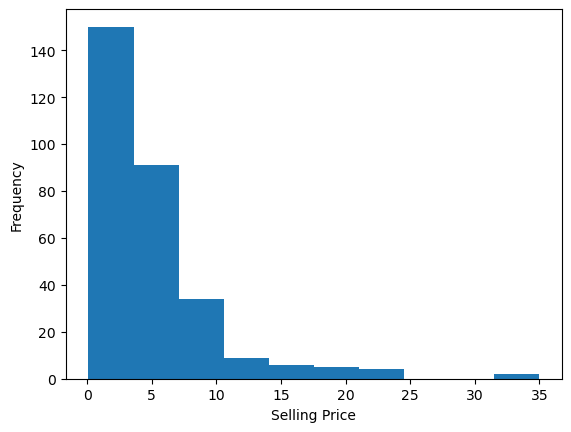

In [12]:
plt.figure()
plt.hist(df['Selling_Price'])
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


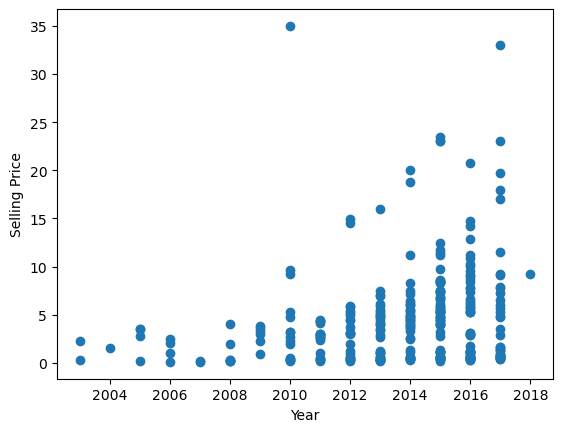

In [13]:
plt.figure()
plt.scatter(df['Year'], df['Selling_Price'])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


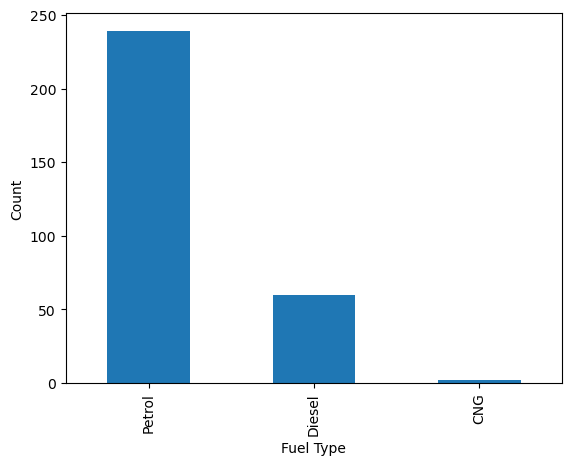

In [14]:
plt.figure()
df['Fuel_Type'].value_counts().plot(kind='bar')
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()



# Feature Selection

In [16]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']


# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Model Prediction

In [19]:
y_pred = model.predict(X_test)


# Model Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.221932362175606
MSE: 3.531579888973429
R2 Score: 0.8466902419661747


In [21]:
model.score(X_test, y_test)


0.8466902419661747